<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

점진적 학습 : 이전에 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방법  
대표적인 예시가 확률적 경사 하강법

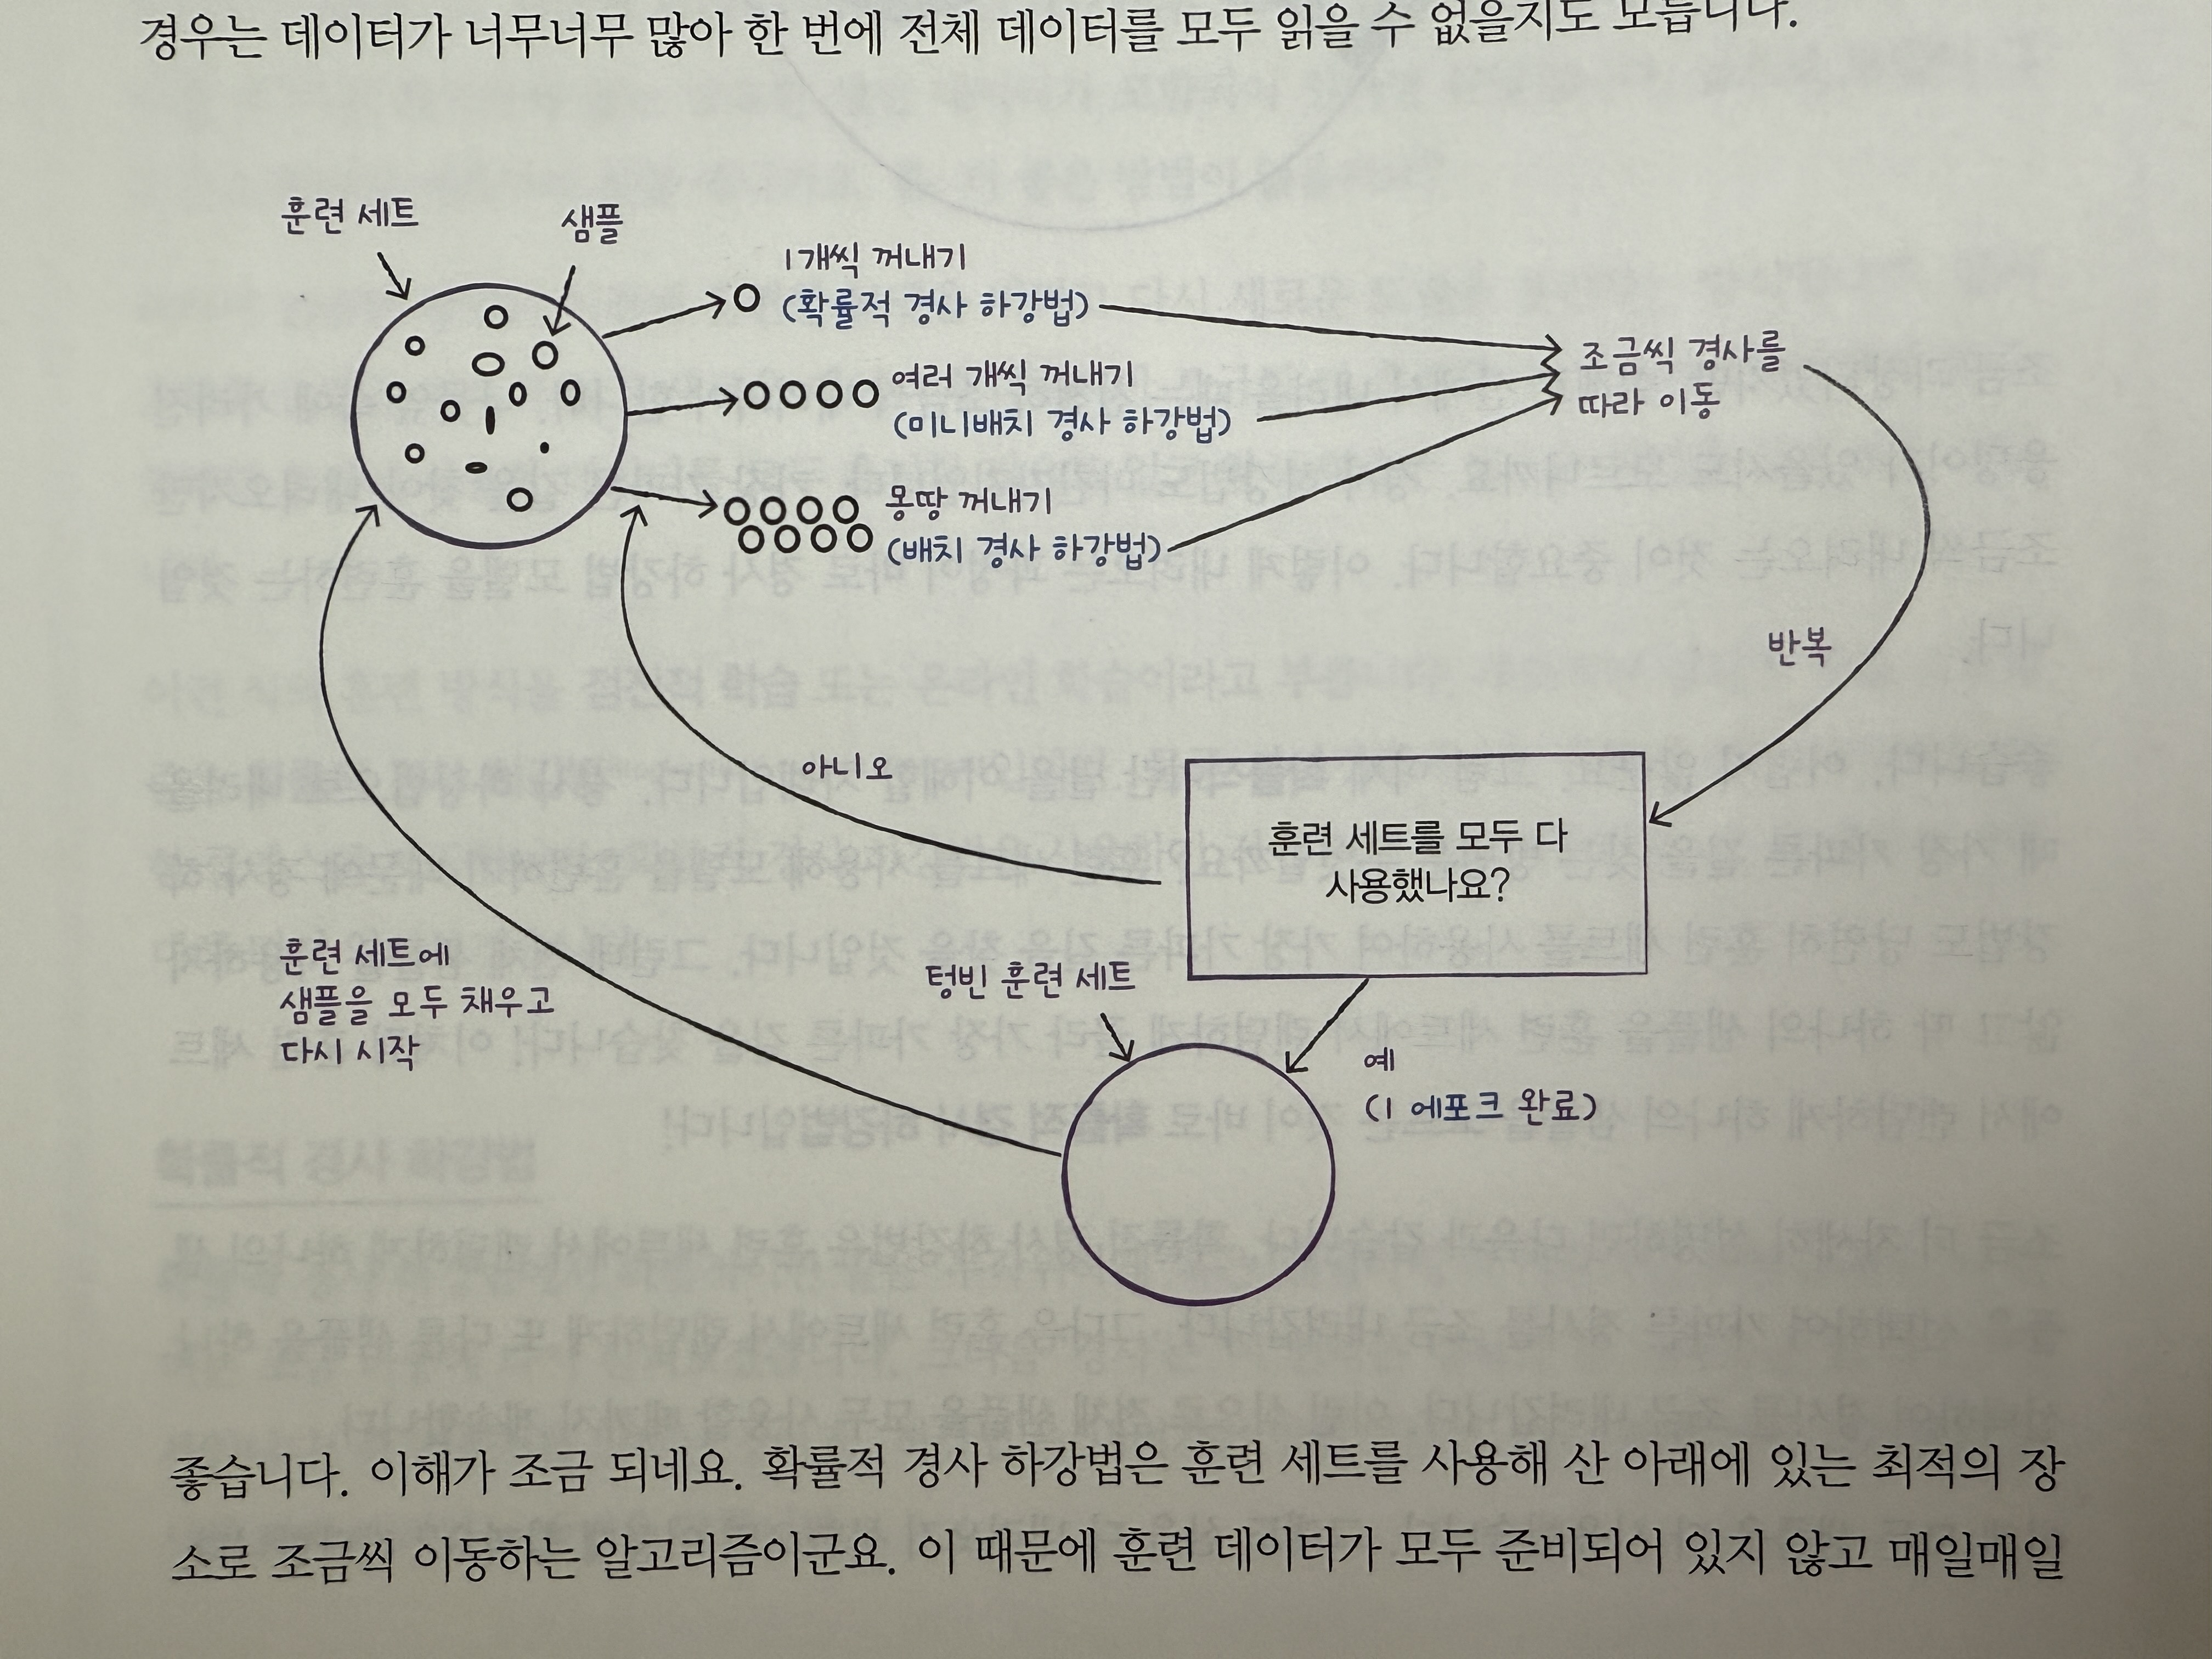

'확률적'이라 함은 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 골라 가장 가파른 길 찾음

내려가는 산이 바로 손실 함수  
손실 함수 : 머신러닝 알고리즘이 얼마나 잘못됐는지 측정하는 기준 -> 값이 작을수록 좋음  
손실함수는 미분가능해야함

로지스틱 손실 함수(이진 크로스엔트로피 손실 함수)  
양성(타깃 1)일 때 -log(예측확률)  
->예측확률이 1에 가까울수록 0에 가까우므로 손실 작음  
음성(타깃 0)일 때 -log(1-예측확률)  
->예측확률이 0에 가까울수록 0에 가까우므로 손실 작음

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

5개는 입력 데이터, species는 타깃

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

표준화 전처리할 때 꼭 훈련 세트에서 학습한 통계값 사용할 것

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


경고에서도 말하듯이 학습 횟수가 너무 적어서 정확도가 낮은 것으로 보임

In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


호출할 때마다 1 에포크씩 이어서 훈련함  
아직 점수가 낮지만 확실히 향상됨  
그러면 언제까지  반복해야할까?

## 에포크와 과대/과소적합

에포크 횟수가 적으면 모델이 훈련 세트 학습을 덜하므로 산을 덜 내려오고 훈련을 마치는 셈  
에포크 횟수가 충분히 많으면 훈련 세트 완전히 학습 -> 잘 맞는 모델 만들어짐  
에포크 횟수가 너무 많으면 과대적합

In [8]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

300번 훈련하는 동안 훈련 세트와 테스트 세트의 점수를 반복할때마다 기록해나감

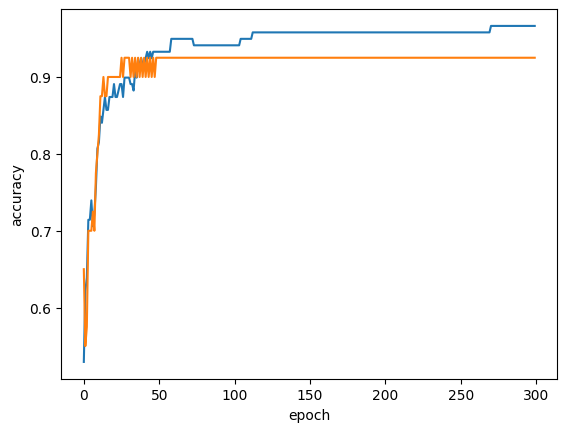

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


tol만큼 향상되지 않으면 자동으로 에포크 멈춤

In [12]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


힌지 손실(for svm) 써봄

데이터의 양이 많아져서 한번에 학습하기 힘드므로 이런 상황에서 확률적 경사 하강법은 활용도가 높음  
언제나 과소적합/과대적합 유의